<a href="https://colab.research.google.com/github/bonseong11/python/blob/main/effi_%EC%9D%B4%EB%AF%B8%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 1s 0us/step


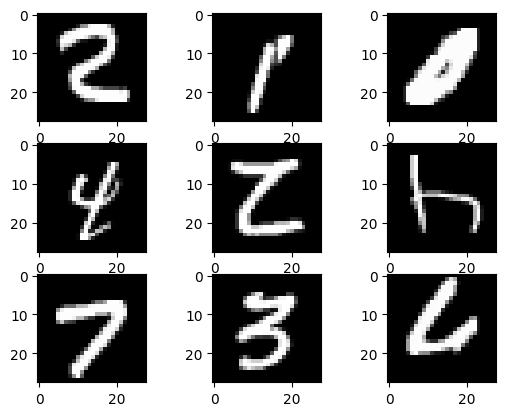

In [ ]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
  for i in range(0, 9):
      pyplot.subplot(330 + 1 + i)
      pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
  pyplot.show()
  break

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
# 상수는 변수화
IMG_CHANNELS = 3 # RGB
IMG_ROWS = 32 # 32X32
IMG_COLS = 32
BATCH_SIZE = 128 # 학습되는 데이터 개수
NB_EPOCH = 20 # 전체 데이터의 학습회수
NB_CLASSES = 10 # 종속변수
VERBOSE = 1 # 학습하면서 설명 출력 여부
VALIDATION_SPLIT = 0.2 # train/validation(학습도중에 검증) / test
OPTIM = RMSprop() # learning-rate를 처음에는 크게 나중에는 작게 조절하는 옵티마이저

In [ ]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)

170498071/170498071 [==============================] - 6s 0us/step
X_train shape: (50000, 32, 32, 3)


In [ ]:
# 종속변수 범주화
Y_train = to_categorical(Y_train, NB_CLASSES)
Y_test = to_categorical(Y_test, NB_CLASSES)
# 이미지 정규화
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /=255
X_test /=255

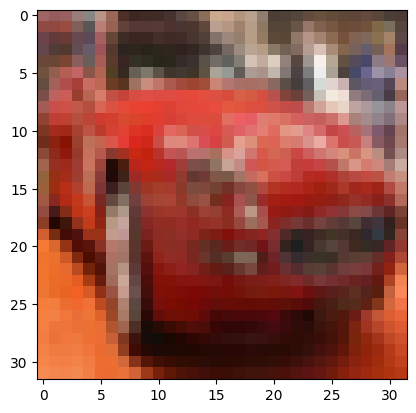

In [ ]:
plt.imshow(X_train[5])
plt.grid(False)
plt.show()

In [ ]:
model = Sequential()
# 32 x 32 x 3
# 가중치 : 3x3x3 x 32 + 32 # 896
# 픽셀수 - 필터 수 + 1
# 출력 차수 : 32 * 32 * 32
model.add(Conv2D(32, (3, 3), padding='same', # 입력 사이즈 == 출력 사이즈
                 input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 16 x 16 * 32
model.add(Dropout(0.25)) # 계산만 25%를 안함 -> 과적합 방지
model.add(Flatten()) # 8192
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES)) # 가중치 512 * 10 + 10 => 출력은 10
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
                    epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

Epoch 1/20
313/313 [==============================] - 16s 19ms/step - loss: 1.7878 - accuracy: 0.3630 - val_loss: 1.4860 - val_accuracy: 0.4717
Epoch 2/20
313/313 [==============================] - 4s 12ms/step - loss: 1.4330 - accuracy: 0.4906 - val_loss: 1.3483 - val_accuracy: 0.5247
Epoch 3/20
313/313 [==============================] - 3s 10ms/step - loss: 1.3071 - accuracy: 0.5345 - val_loss: 1.3141 - val_accuracy: 0.5353
Epoch 4/20
313/313 [==============================] - 3s 8ms/step - loss: 1.2250 - accuracy: 0.5680 - val_loss: 1.2441 - val_accuracy: 0.5611
Epoch 5/20
313/313 [==============================] - 2s 7ms/step - loss: 1.1545 - accuracy: 0.5899 - val_loss: 1.1378 - val_accuracy: 0.6033
Epoch 6/20
313/313 [==============================] - 2s 7ms/step - loss: 1.0921 - accuracy: 0.6158 - val_loss: 1.1188 - val_accuracy: 0.5998
Epoch 7/20
313/313 [==============================] - 2s 7ms/step - loss: 1.0402 - accuracy: 0.6327 - val_loss: 1.0428 - val_accuracy: 0.6408
Ep

In [ ]:
score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest loss:", score[0])
print("Test accuracy", score[1])

79/79 [==============================] - 0s 5ms/step - loss: 0.9978 - accuracy: 0.6785

Test loss: 0.997792661190033
Test accuracy 0.6784999966621399


In [ ]:
# 웹에서 사용
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json) # 모델 구조
model.save_weights('cifar10_weights.h5', overwrite=True) # 가중치

In [ ]:
from imageio import imread
from skimage.transform import resize
from keras.models import model_from_json
from keras.optimizers import SGD
model_architecture = 'cifar10_architecture.json'
model_weights = 'cifar10_weights.h5'
model = model_from_json(open(model_architecture).read())
model.load_weights(model_weights)

In [ ]:
# 문제 : 이미지를 2장 로딩한 다음 예측 하시오 predict

In [ ]:
%cp /content/drive/MyDrive/cat.0.jpg .

In [ ]:
%cp /content/drive/MyDrive/dog.0.jpg .

In [ ]:
%cp /content/drive/MyDrive/bird.jpg .

In [ ]:
img_names = ['cat.0.jpg', 'dog.0.jpg', 'bird.jpg']

In [ ]:
import numpy as np
from imageio import imread
from skimage.transform import resize
imgs = [resize(imread(img_name),(32,32)).astype('float32')for
        img_name in img_names]
imgs = np.array(imgs) / 255

<ipython-input-18-a30fd5f0fd19>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imgs = [resize(imread(img_name),(32,32)).astype('float32')for


In [ ]:
cifa10_name=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predictions = model.predict(imgs)
print(predictions)
for pred in predictions:
  print(cifa10_name[np.argmax(pred)]) # 제일큰놈을 찾아 인덱스값으로 표현해줌

1/1 [==============================] - 0s 104ms/step
[[0.2836018  0.00297482 0.10647114 0.37894997 0.03440382 0.00083927
  0.00059623 0.01832328 0.17231102 0.00152871]
 [0.28459838 0.00308869 0.1053557  0.38358745 0.03345227 0.00085444
  0.0005327  0.01807338 0.16891229 0.00154471]
 [0.2873597  0.00300906 0.10636564 0.37441865 0.03495582 0.00082617
  0.0005564  0.0181805  0.17278583 0.00154226]]
cat
cat
cat


pre-trained model의 사용 in keras

In [ ]:
import matplotlib.pyplot as plt
# pre-trained model
# decode_predictions
from tensorflow.keras.applications.inception_v3 import InceptionV3, decode_predictions
inceptionv3 = InceptionV3(input_shape=(299, 299, 3)) # Conv2D, Polling
# 1x1 3x3 5x5 => 특징을 여러개를 추출 한다음에 다시 concatenate 병

96112376/96112376 [==============================] - 4s 0us/step


35363/35363 [==============================] - 0s 0us/step
테스트 시 소요 시간 : 2.270765542984009
pitcher (99.77%)


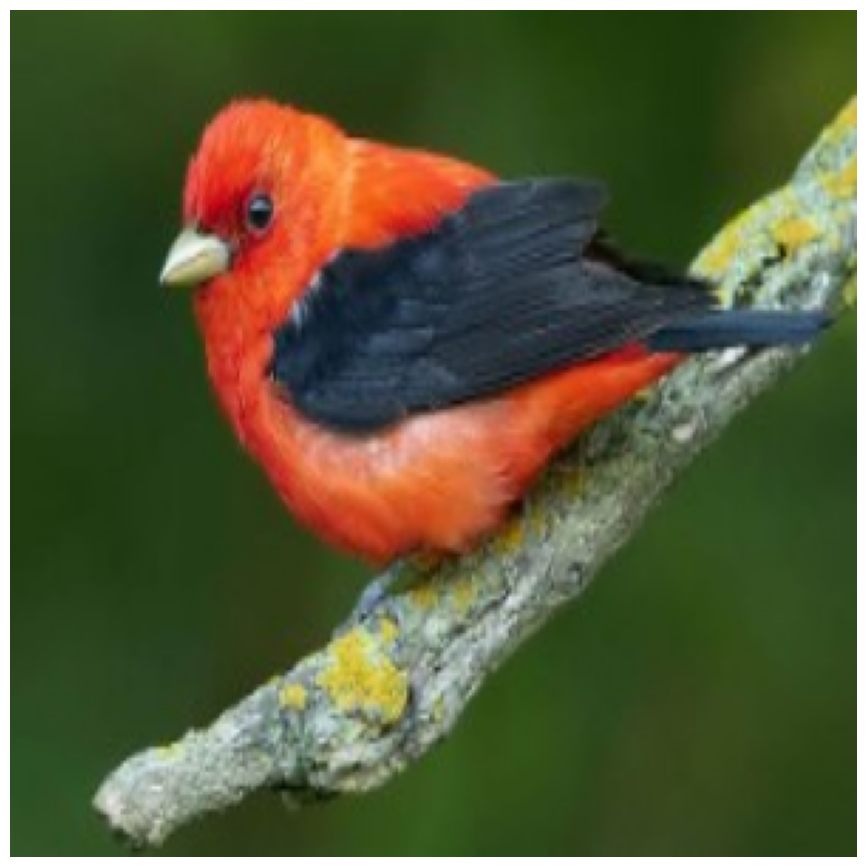

In [ ]:
import cv2
import time
img = cv2.imread('/content/drive/MyDrive/bird.jpg',-1)
img = cv2.resize(img, (299, 299))
start = time.time()
yhat = inceptionv3.predict(img.reshape(-1, 299, 299, 3))
time = time.time() - start
# (class_name, class_description, score)
label = decode_predictions(yhat) # 리스트로 리턴 (이미지 마다 3개정보를)
label = label[0][0] # 이미지 번호

print('테스트 시 소요 시간 : {}'.format(time))
print('%s (%.2f%%)' % (label[1], label[2]*100))
img = img[:, :, ::-1]
plt.figure(figsize=(11, 11))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
label

('n03950228', 'pitcher', 0.9976781)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
train_ds, validation_ds, test_ds = tfds.load(
    'cats_vs_dogs',
    split=['train[:40%]', 'train[40%:50%]', 'train[50%:60%]'],
    #  tfds.load(). 데이터 세트는 교육용 40%, 검증용 10%, 테스트용 10%의 세 부분으로 나뉩니다
    as_supervised=True,
)
print("학습훈련셀: %d" % tf.data.experimental.cardinality(train_ds))
print("검증훈련셀: %d" % tf.data.experimental.cardinality(validation_ds))
print("테스트훈련셀: %d" % tf.data.experimental.cardinality(test_ds))

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.
학습훈련셀: 9305
검증훈련셀: 2326
테스트훈련셀: 2326


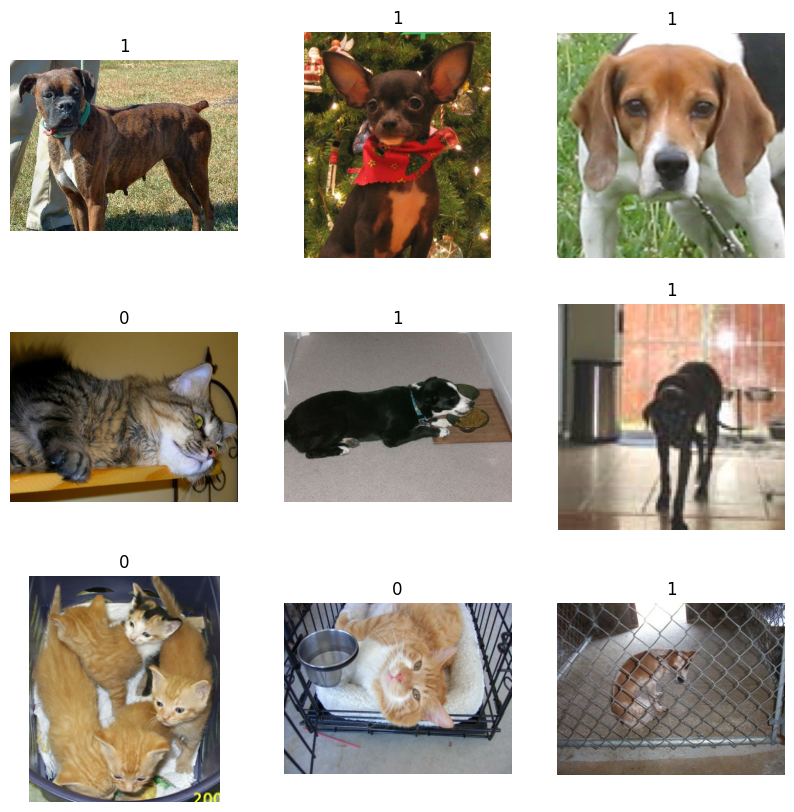

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
#  train_ds하고 함수를 사용하여 이미지-레이블 쌍을 검색합니다 
# enumerate. 를 사용하여 데이터 세트의 처음 9개 요소를 사용합니다 take(9).
for i, (image, label) in enumerate(train_ds.take(9)): 
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis('off')

In [ ]:
size = (150, 150) # 이미지 사이즈가 중요한 역할
train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))

In [ ]:
batch_size = 32
train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)
test_ds = test_ds.cache().batch(batch_size).prefetch(buffer_size=10)


In [ ]:
# 데이터 증강
from tensorflow.keras import layers
data_augmentation = keras.Sequential( # 데이터를 증강
    [layers.RandomFlip('horizontal'), layers.RandomRotation(0.1),]
)

In [ ]:
base_model = keras.applications.Xception(
    weights='imagenet',
    input_shape=(150, 150, 3),
    include_top=False, # 1000개로 출력레이어 불포함 softmax를 사용하던것
)
base_model.trainable = False # 모든 레이어는 학습 불가능 학습 하지 않음
inputs = keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs) # 데이터 증강
# 이미지 -1~1사이의 정규화
# color 255,255,255 : 0~1
# 0~2 127.5로 옵셋 -1을 하면 -1~1값이됨 스케일링함
scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1) # 
x = scale_layer(x)
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
model.summary() # none은 batch 사이즈 
#  dense_2 (Dense)             (None, 1)                 2049   얘만 학습이됨

83683744/83683744 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0      

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)
epochs=20
history = model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Epoch 1/20
291/291 [==============================] - 44s 132ms/step - loss: 0.1665 - binary_accuracy: 0.9265 - val_loss: 0.0839 - val_binary_accuracy: 0.9665
Epoch 2/20
291/291 [==============================] - 24s 82ms/step - loss: 0.1160 - binary_accuracy: 0.9521 - val_loss: 0.0775 - val_binary_accuracy: 0.9690
Epoch 3/20
291/291 [==============================] - 24s 83ms/step - loss: 0.1113 - binary_accuracy: 0.9525 - val_loss: 0.0743 - val_binary_accuracy: 0.9725
Epoch 4/20
291/291 [==============================] - 25s 85ms/step - loss: 0.1054 - binary_accuracy: 0.9572 - val_loss: 0.0753 - val_binary_accuracy: 0.9699
Epoch 5/20
291/291 [==============================] - 24s 83ms/step - loss: 0.1029 - binary_accuracy: 0.9575 - val_loss: 0.0734 - val_binary_accuracy: 0.9703
Epoch 6/20
291/291 [==============================] - 23s 79ms/step - loss: 0.0982 - binary_accuracy: 0.9600 - val_loss: 0.0734 - val_binary_accuracy: 0.9695
Epoch 7/20
291/291 [==============================]

In [ ]:
# 문제 테스트 데이터 입력해서 예측 한 다음 loss와 accuracy를 출력해 보시오
# loss와 val_loss를 시각화 해보시요

In [ ]:
score = model.evaluate(test_ds, verbose=0)
print("\nTest loss:", score[0])
print("Test accuracy", score[1])


Test loss: 0.0756920725107193
Test accuracy 0.969475507736206


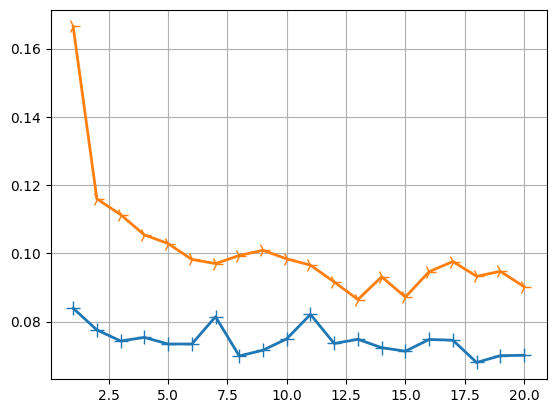

In [ ]:
import numpy
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth = 2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.grid(True)
plt.show()

In [ ]:
# 값의 해석 (-1, ~ 1 사이의 값으로 정규화 되었다.)
res = model.predict(test_ds)
res[0]

73/73 [==============================] - 6s 60ms/step


array([-8.569195], dtype=float32)

# EfficientNet

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import optimizers
import os
import glob
import shutil
import sys
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from IPython.display import Image

In [ ]:
batch_size = 48
width = 150
height = 150
epochs = 20
NUM_TRAIN = 2000
NUM_TEST = 1000
dropout_rate = 0.2
input_shape = (height, width, 3)

In [ ]:
%cd /content

/content


In [ ]:
import os
if not os.path.isdir('efficientent_keras_transfer_learning'):
    !git clone https://github.com/Tony607/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning

Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 171, done.
remote: Total 171 (delta 0), reused 0 (delta 0), pack-reused 171
Receiving objects: 100% (171/171), 5.44 MiB | 14.40 MiB/s, done.
Resolving deltas: 100% (98/98), done.
/content/efficientnet_keras_transfer_learning


In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0 as Net
from tensorflow.keras.layers import CenterCrop
from tensorflow.keras.applications.efficientnet import preprocess_input
conv_base = Net(weights='imagenet', include_top=False, input_shape=input_shape)

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/catsanddogs.zip', 'r') as zip:
    zip.extractall()
    print('done')

done


In [ ]:
%cd /content

/content


In [ ]:
original_dataset_dir = 'PetImages'
cat_images = glob.glob(os.path.join(original_dataset_dir, 'Cat', '*.jpg'))
dog_images = glob.glob(os.path.join(original_dataset_dir, 'Dog', '*.jpg'))
print('total cat images: {}\n\rtotal dog images: {}'.format(len(cat_images),
                                                            len(dog_images)))

total cat images: 12500
total dog images: 12500


In [ ]:
# 디렉터리 구조
# train test validation

In [ ]:
base_dir = './data/dog_vs_cat_small'
os.makedirs(base_dir, exist_ok = True)
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok = True)
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok = True)
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok = True)
train_cats_dir = os.path.join(train_dir, 'cats')
os.makedirs(train_cats_dir, exist_ok = True)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.makedirs(train_dogs_dir, exist_ok = True)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.makedirs(validation_cats_dir, exist_ok = True)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.makedirs(validation_dogs_dir, exist_ok = True)
test_cats_dir = os.path.join(test_dir, 'cats')
os.makedirs(test_cats_dir, exist_ok = True)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.makedirs(test_dogs_dir, exist_ok = True)

In [ ]:
# 데이터 분할
fnames = cat_images[:NUM_TRAIN // 2]
for fname in fnames:
  dst = os.path.join(train_cats_dir, os.path.basename(fname))
  shutil.copyfile(fname, dst) # dst를 fname으로 복사
offset = NUM_TRAIN // 2


fnames = cat_images[offset:offset + NUM_TEST // 2]
for fname in fnames:
  dst = os.path.join(validation_cats_dir, os.path.basename(fname))
  shutil.copyfile(fname, dst)
offset = offset + NUM_TEST // 2

# validation data == test data
fnames = cat_images[offset:offset + NUM_TEST // 2]
for fname in fnames:
  dst = os.path.join(test_cats_dir, os.path.basename(fname))
  shutil.copyfile(fname, dst)


fnames = dog_images[:NUM_TRAIN // 2]
for fname in fnames:
  dst = os.path.join(train_dogs_dir, os.path.basename(fname))
  shutil.copyfile(fname, dst)
offset = NUM_TRAIN // 2


fnames = dog_images[offset:offset + NUM_TEST // 2]
for fname in fnames:
  dst = os.path.join(validation_dogs_dir, os.path.basename(fname))
  shutil.copyfile(fname, dst)
offset = offset + NUM_TEST // 2


fnames = dog_images[offset:offset + NUM_TEST // 2]
for fname in fnames:
  dst = os.path.join(test_dogs_dir, os.path.basename(fname))
  shutil.copyfile(fname, dst)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255, # 정규화
    rotation_range=40, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, # 전단
    zoom_range=0.2, # 일부확대해서
    horizontal_flip = True, # 수평으로 반뒤집어가지고
    fill_mode = 'nearest') # 빈경우가 발생할때 가장가까이 있는 컬러로 찍어라
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(height, width), # 로딩하면서 resize : 모델이 입력될 땐 사이즈가 동일
    batch_size=batch_size,
    class_mode = 'categorical') # 종속변수는 범주화 시켜라
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (height, width),
    batch_size=batch_size,
    class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
model = models.Sequential()
model.add(conv_base) # EfficientNetB0
model.add(layers.GlobalMaxPooling2D(name='gap')) # 사이즈를 줄여서 쭉 늘려줌 flatten 하는 것과 동
if dropout_rate >0:
  model.add(layers.Dropout(dropout_rate, name='dropout_out'))
# 확률값으로 출력
model.add(layers.Dense(2, activation='softmax', name='fc_out'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 5, 5, 1280)       4049571   
                                                                 
 gap (GlobalMaxPooling2D)    (None, 1280)              0         
                                                                 
 dropout_out (Dropout)       (None, 1280)              0         
                                                                 
 fc_out (Dense)              (None, 2)                 2562      
                                                                 
Total params: 4,052,133
Trainable params: 4,010,110
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
conv_base.trainable = False # application

In [ ]:
!pwd

/content


In [ ]:
%cd /content

/content


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])
history = model.fit_generator(
    train_generator, # 32 batch size
    steps_per_epoch = NUM_TRAIN // batch_size,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = NUM_TEST // batch_size,
    verbose=1, # 설명을 출력하면
    use_multiprocessing=True,
    workers=4)

<ipython-input-19-7dcb1b85fa45>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
41/41 [==============================] - 40s 548ms/step - loss: 1.1346 - acc: 0.5031 - val_loss: 0.7033 - val_acc: 0.5010
Epoch 2/20
41/41 [==============================] - 26s 610ms/step - loss: 1.1382 - acc: 0.5087 - val_loss: 0.6980 - val_acc: 0.4979
Epoch 3/20
41/41 [==============================] - 27s 627ms/step - loss: 1.1184 - acc: 0.5067 - val_loss: 0.6960 - val_acc: 0.5042
Epoch 4/20
41/41 [==============================] - 27s 625ms/step - loss: 1.0898 - acc: 0.5108 - val_loss: 0.6964 - val_acc: 0.5031
Epoch 5/20
41/41 [==============================] - 22s 499ms/step - loss: 1.1235 - acc: 0.4939 - val_loss: 0.6958 - val_acc: 0.5000
Epoch 6/20
41/41 [==============================] - 27s 634ms/step - loss: 1.1610 - acc: 0.4734 - val_loss: 0.6943 - val_acc: 0.4969
Epoch 7/20
41/41 [==============================] - 26s 609ms/step - loss: 1.1025 - acc: 0.5118 - val_loss: 0.6986 - val_acc: 0.4969
Epoch 8/20
41/41 [==============================] - 26s 601ms/step - 

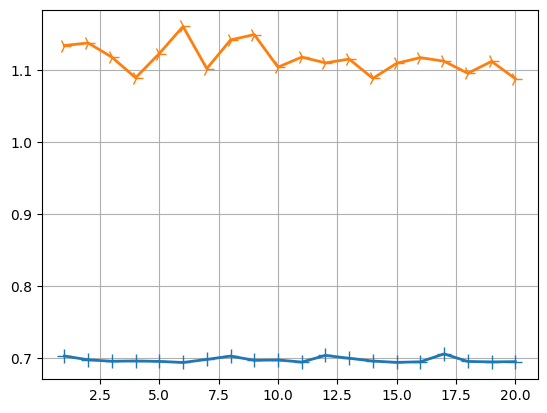

In [ ]:
import numpy
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth = 2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.grid(True)
plt.show()

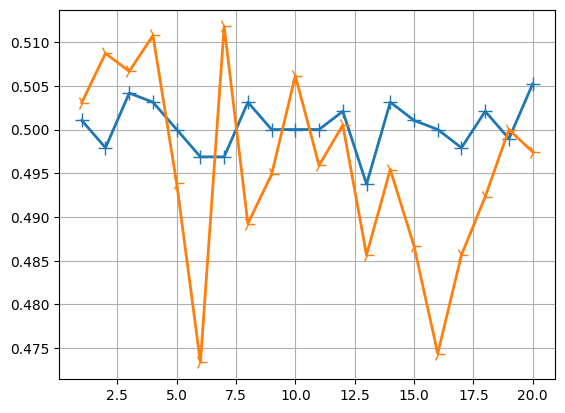

In [ ]:
import numpy
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test acc')
line2 = plt.plot(epochs, acc_values, label='Training Acc')
plt.setp(line1, linewidth = 2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.grid(True)
plt.show()

In [ ]:
%cd /content

/content


In [ ]:
os.makedirs("./models", exist_ok=True)
model.save('/content/data/dog_vs_cat_small.h5')

TypeError: ignored